In [19]:
# assume working in Jupyter Lab
%matplotlib inline 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pywed as pw
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (10,6)

from control_room import *
from pulse_database import PulseDB

import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [21]:
from scipy.optimize import curve_fit 
from tqdm import tqdm

# Importing Resumed Parameters

In [22]:
data_Q1 = pd.read_csv('WEST_C3b_database_resumed_parameters_Q1.csv')
data_Q1.head()

,Unnamed: 0,pulse,t,P_IC_avg,Rc_avg,V7_avg,V9_avg,V10_avg,V11_avg,V21_avg,...,Ip_avg,auto_matching,Lang1_avg,Lang2_avg,Lang3_avg,Lang4_avg,Lang5_avg,Lang6_avg,Lang7_avg,Lang8_avg
0,0,53566,3.571331,15.458,0.05369,0.02364,-0.00660,-0.00012,0.00772,0.00688,...,299.72,0,0.0912,0.2206,0.3040,8.7972,0.1612,-0.1898,2.5756,3.9316
1,1,53566,3.622531,6.602,0.04996,0.15748,-0.00720,-0.01480,0.00596,-0.00596,...,299.88,0,0.0844,0.1960,0.2758,8.3966,0.1780,-0.1708,2.6096,3.9458
2,2,53566,3.673730,4.136,0.04694,0.36416,0.00332,0.00852,0.00504,0.00036,...,299.84,0,0.0892,0.2324,0.2644,8.2648,0.2340,-0.1644,2.5086,4.0264
3,3,53566,3.724930,12.768,0.05311,0.54860,0.00532,0.00200,-0.00536,0.00028,...,299.68,0,0.0982,0.2808,0.2216,8.0732,0.2484,-0.1776,2.3214,3.6758
4,4,53566,3.776130,6.106,0.04875,0.73468,-0.00736,-0.02696,-0.00136,0.00260,...,299.68,0,0.1052,0.3350,0.2648,8.5676,0.3052,-0.1376,2.4098,4.0706


In [23]:
data_Q2 = pd.read_csv('WEST_C3b_database_resumed_parameters_Q2.csv')
data_Q2.head()

,Unnamed: 0,pulse,t,P_IC_avg,Rc_avg,V7_avg,V9_avg,V10_avg,V11_avg,V21_avg,...,Ip_avg,auto_matching,Lang1_avg,Lang2_avg,Lang3_avg,Lang4_avg,Lang5_avg,Lang6_avg,Lang7_avg,Lang8_avg
0,0,53596,5.565063,142.662502,0.165323,-0.016708,-0.003292,-0.021625,0.016500,-0.000417,...,601.083333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,53596,5.614215,63.520834,0.383115,-0.009958,0.007042,0.000208,0.007708,0.002917,...,601.666667,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,53596,5.663367,52.029167,0.379104,0.003917,-0.002042,-0.005708,-0.006292,-0.006542,...,600.791667,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,53596,5.712519,14.743750,0.483042,0.026750,-0.001333,-0.003250,0.002333,0.015667,...,600.250000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,53596,5.761671,130.768752,0.161563,0.010708,0.005167,0.004833,-0.007708,-0.006250,...,600.041667,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Importing all the data

In [24]:
hdf5_filename = 'databases/WEST_C3b_ICRH_pulse_data.hdf5'
db = PulseDB(hdf5_filename)
print(f'Database contains {len(db.pulse_list)} shots, from #{db.pulse_list[0]} to #{db.pulse_list[-1]} ')

Database contains 131 shots, from #53566 to #54178 


# Langmuir probes 

Text(0.5, 1.0, 'LHCD antennas Langmuir probes')

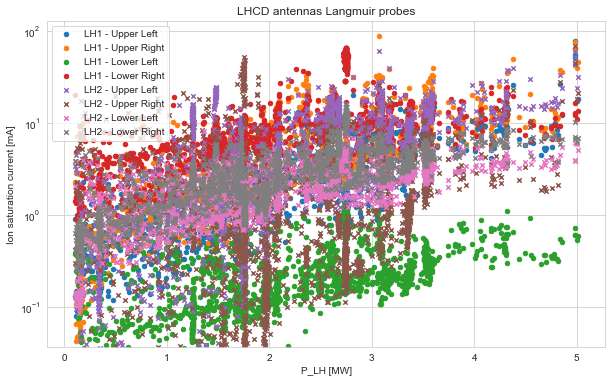

In [25]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
labels = ['LH1 - Upper Left', 'LH1 - Upper Right', 'LH1 - Lower Left', 'LH1 - Lower Right', 
          'LH2 - Upper Left', 'LH2 - Upper Right', 'LH2 - Lower Left', 'LH2 - Lower Right', ]
markers = ['o', 'o', 'o', 'o',
          'x', 'x', 'x', 'x']
for idx in range(8):
    data_Q2.query('P_LH_avg > 0.1').plot(ax=ax, x='P_LH_avg', y=f'Lang{idx+1}_avg', kind='scatter', 
                                         #c='Ip_avg', colorbar=False, alpha=.5, cmap='viridis',
                                         c=sns.color_palette()[idx],
                                         label=labels[idx], marker=markers[idx])
ax.set_yscale('log')
ax.set_ylabel('Ion saturation current [mA]')
ax.set_xlabel('P_LH [MW]')
ax.set_title('LHCD antennas Langmuir probes')
#fig.savefig('WEST_C3b_LangmuirLHCD_vs_P_LH.png', dpi=150)

Il y'a un groupe de points étrange sur LH1 Lower Right. Ils correspondent à des chocs à courant plasma ~ 400 kA.

Text(0.5, 1.0, 'LHCD antennas Langmuir probes')

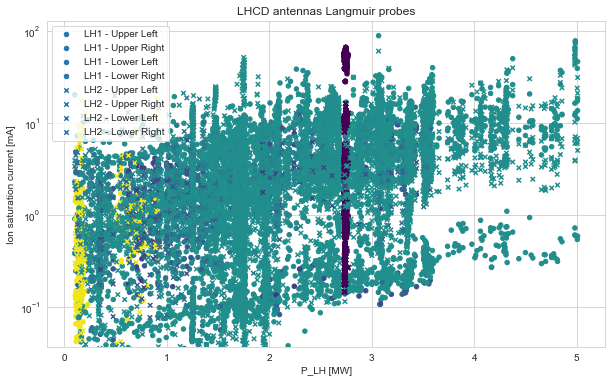

In [26]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
labels = ['LH1 - Upper Left', 'LH1 - Upper Right', 'LH1 - Lower Left', 'LH1 - Lower Right', 
          'LH2 - Upper Left', 'LH2 - Upper Right', 'LH2 - Lower Left', 'LH2 - Lower Right', ]
markers = ['o', 'o', 'o', 'o',
          'x', 'x', 'x', 'x']
for idx in range(8):
    data_Q2.query('P_LH_avg > 0.1').plot(ax=ax, x='P_LH_avg', y=f'Lang{idx+1}_avg', kind='scatter', 
                                         c='Ip_avg', colorbar=False, cmap='viridis',
                                         #c=sns.color_palette()[idx] ,
                                         label=labels[idx], marker=markers[idx])
ax.set_yscale('log')
ax.set_ylabel('Ion saturation current [mA]')
ax.set_xlabel('P_LH [MW]')
ax.set_title('LHCD antennas Langmuir probes')

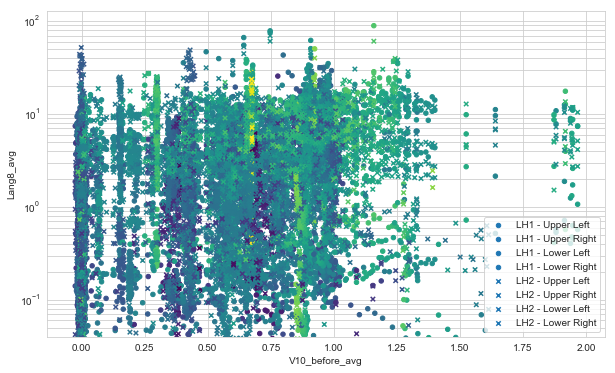

In [27]:
fig, ax = plt.subplots()
for idx in range(8):
    data_Q2.query(' Ip_avg > 420').plot(ax=ax, kind='scatter', x='V10_before_avg', y=f'Lang{idx+1}_avg', 
                                        label=labels[idx], marker=markers[idx], 
                                        #c=sns.color_palette()[idx], 
                                        c='nl_avg', colorbar=False, cmap='viridis',
                                        )
ax.set_yscale('log')
ax.set_ylim(0.04, 130)
ax.grid(True, which='minor')

En théorie, seuls les sondes supérieures sont connectées à Q2

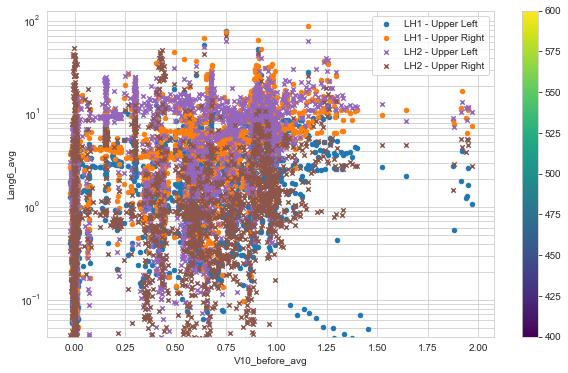

In [29]:
fig, ax = plt.subplots()

colscale='Ip_avg'
norm=plt.Normalize(vmin=400, vmax=600)
cmap='viridis'

for idx in [0,1,4,5]:
    data_Q2.query('Ip_avg > 420').plot(ax=ax, kind='scatter', x='V10_before_avg', y=f'Lang{idx+1}_avg', 
                                        label=labels[idx], marker=markers[idx],
                                        #c=sns.color_palette()[idx], 
                                        c=sns.color_palette()[idx], colorbar=False, cmap='viridis', #norm=norm ,
                                        )
ax.set_yscale('log')
ax.set_ylim(0.04, 130)
ax.grid(True, which='minor')
# Adding  colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # hack
fig.colorbar(sm)


Quels sont ces points LH1 Lower RIght ?

In [30]:
data_Q2.query('P_LH_avg < 0.1').query('Lang4_avg > 10')['pulse'].unique()

array([53694, 53696, 53917], dtype=int64)

Fitting the curves to get a better view

In [31]:
def exp_fit(x, a, k):
    return a*np.exp(k*x)

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 15.80it/s]


Text(0.5, 1.0, 'LHCD antennas Langmuir probes (exp fit)')

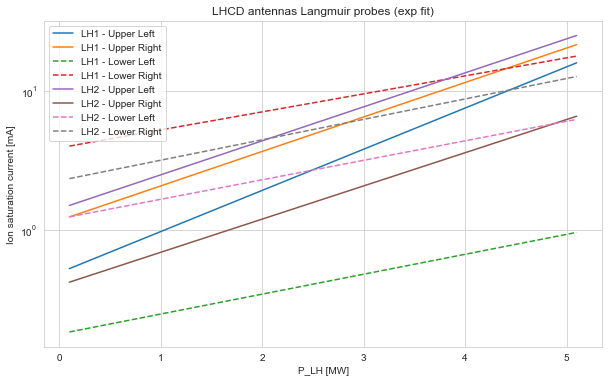

In [32]:

P_LH = np.linspace(0.1, 5.1, num=101)
ls = ['-', '-', '--', '--',
      '-', '-', '--', '--']
fig, ax = plt.subplots()
for idx in tqdm(range(8)):
    y = data_Q2.query('P_LH_avg > 0.1').query(f'Lang{idx+1}_avg < 30')[f'Lang{idx+1}_avg']
    x = data_Q2.query('P_LH_avg > 0.1').query(f'Lang{idx+1}_avg < 30')['P_LH_avg']  
    p, _ = curve_fit(exp_fit, x, y, p0=(1,1))
    ax.plot(P_LH, exp_fit(P_LH, *p), ls=ls[idx])
    #ax.scatter(x, y, alpha=0.2)
ax.legend(labels)
ax.set_yscale('log')

ax.set_ylabel('Ion saturation current [mA]')
ax.set_xlabel('P_LH [MW]')
ax.set_title('LHCD antennas Langmuir probes (exp fit)')
#fig.savefig('WEST_C3b_LangmuirLHCD_vs_P_LH_fit.png', dpi=150)

# Figures pour Guillaume (19/04/2019)

On moyenne les courants de saturation mesurés sur les antennes LH :

In [33]:
data_Q2['Lang_LH1_avg'] = (data_Q2['Lang1_avg'] + data_Q2['Lang2_avg'] + data_Q2['Lang4_avg'])/3
data_Q2['Lang_LH2_avg'] = (data_Q2['Lang5_avg'] + data_Q2['Lang6_avg'] + data_Q2['Lang7_avg'] + data_Q2['Lang8_avg'])/4

In [34]:
data_Q2['ne_LH1_sur_nl'] = data_Q2['Lang_LH1_avg'] / data_Q2['nl_avg']
data_Q2['ne_LH2_sur_nl'] = data_Q2['Lang_LH2_avg'] / data_Q2['nl_avg']

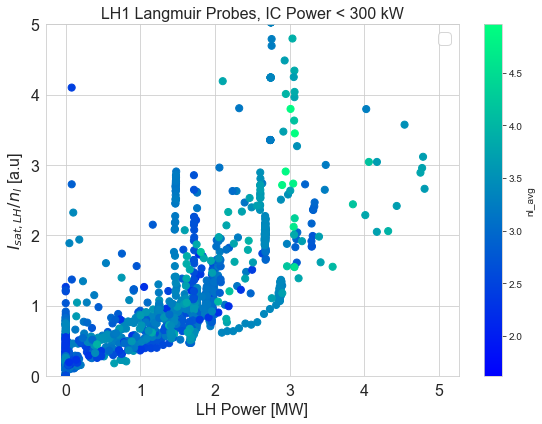

In [35]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
data_Q2.query('P_IC_avg < 300').query('freq_Q2 > 40').query('gap_median < 40').plot(ax=ax, kind='scatter', 
             x='P_LH_avg', y='ne_LH1_sur_nl',
            c='nl_avg', cmap='winter', s=50)
ax.set_ylim(0,5)
ax.set_xlabel('LH Power [MW]', fontsize=16)
ax.set_ylabel('$I_{sat,LH}/n_l$ [a.u]', fontsize=16)
ax.set_title('LH1 Langmuir Probes, IC Power < 300 kW', fontsize=16)

ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)


fig.tight_layout()

fig.savefig('2019-04-19_IsatLH1SurNl_vs_PLH.png', dpi=150)

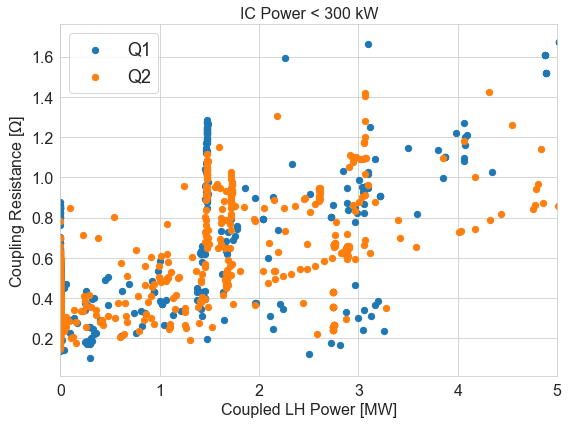

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
data_Q1.query('P_IC_avg > 50 & P_IC_avg< 300').query('freq_Q2 > 50').plot(ax=ax, kind='scatter',
             y='Rc_avg', x='P_LH_avg',                                                               
            c=sns.color_palette()[0], s=40, label='Q1')

data_Q2.query('P_IC_avg > 50 & P_IC_avg< 300').query('freq_Q2 > 50').plot(ax=ax, kind='scatter',
             y='Rc_avg', x='P_LH_avg', 
             c=sns.color_palette()[1], s=40, label='Q2')


ax.set_ylabel('Coupling Resistance [$\Omega$]', fontsize=16)
ax.set_xlabel('Coupled LH Power [MW]', fontsize=16)
ax.set_xlim(0,5)
ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('IC Power < 300 kW', fontsize=16)
fig.tight_layout()

fig.savefig('2019-04-19_Rc_vs_Plh.png', dpi=150)

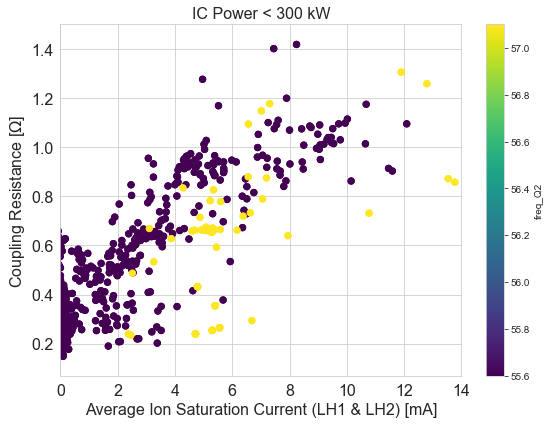

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
data_Q2.query('P_IC_avg > 50 & P_IC_avg< 300').query('freq_Q2 > 50').plot(ax=ax, kind='scatter',
             y='Rc_avg', x='Lang_LH2_avg', c='freq_Q2', cmap='viridis', colorbar=False,
              s=40)
data_Q2.query('P_IC_avg > 50 & P_IC_avg< 300 ').query('freq_Q2 > 50').plot(ax=ax, kind='scatter',
             y='Rc_avg', x='Lang_LH2_avg', c='freq_Q2', cmap='viridis',
              s=40)

ax.set_ylabel('Coupling Resistance [$\Omega$]', fontsize=16)
ax.set_xlabel('Average Ion Saturation Current (LH1 & LH2) [mA]', fontsize=16)
ax.set_xlim(0,14)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('IC Power < 300 kW', fontsize=16)
fig.tight_layout()

fig.savefig('2019-04-19_Rc_vs_IonSat.png', dpi=150)

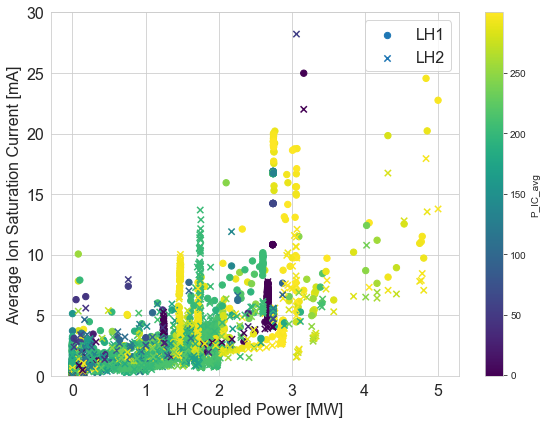

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
data_Q2.query('P_IC_avg < 300').plot(ax=ax, kind='scatter',
             x='P_LH_avg', y='Lang_LH1_avg', c='P_IC_avg', cmap='viridis', colorbar=False,
             label='LH1', s=40)
data_Q2.query('P_IC_avg < 300').plot(ax=ax, kind='scatter',
             x='P_LH_avg', y='Lang_LH2_avg', c='P_IC_avg', cmap='viridis',
            label='LH2', marker='x', s=40)
ax.set_ylim(0, 30)
ax.set_xlabel('LH Coupled Power [MW]', fontsize=16)
ax.set_ylabel('Average Ion Saturation Current [mA]', fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('IC Power < 300 kW')
fig.tight_layout()

fig.savefig('2019-04-19_IsatMean_vs_PLH.png', dpi=150)

# Gaz injection with LH
let's look how behave the coupling resistance when we inject a constant LH power background

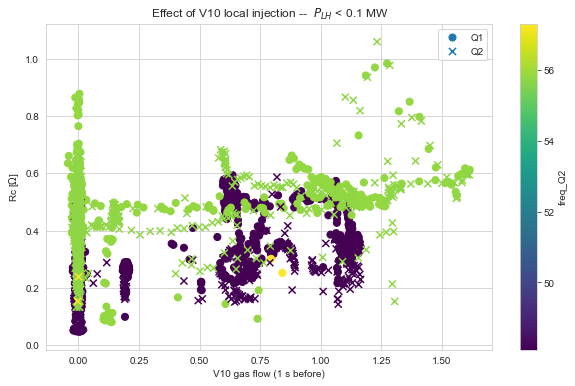

In [39]:
fig, ax = plt.subplots()
data_Q1.query('P_LH_avg < 0.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q1', s=50, cmap='viridis', colorbar=False, label='Q1')
data_Q2.query('P_LH_avg < 0.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q2', s=50, cmap='viridis', label='Q2', marker="x")
ax.set_title('Effect of V10 local injection --  $P_{LH}$ < 0.1 MW')
ax.set_xlabel('V10 gas flow (1 s before)')
ax.set_ylabel('Rc [$\Omega$]')

fig.savefig('WEST_C3b_Rc_vs_V10before_vs_freq_Plh0MW.png', dpi=150)

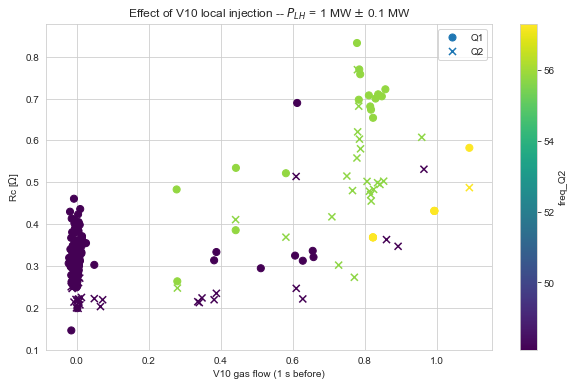

In [40]:
fig, ax = plt.subplots()
data_Q1.query('P_LH_avg > 0.9 & P_LH_avg < 1.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q1', s=50, cmap='viridis', colorbar=False, label='Q1')
data_Q2.query('P_LH_avg > 0.9 & P_LH_avg < 1.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q2', s=50, cmap='viridis', label='Q2', marker="x")
ax.set_title('Effect of V10 local injection -- $P_{LH}$ = 1 MW $\pm$ 0.1 MW')
ax.set_xlabel('V10 gas flow (1 s before)')
ax.set_ylabel('Rc [$\Omega$]')
fig.savefig('WEST_C3b_Rc_vs_V10before_vs_freq_Plh1MW.png', dpi=150)


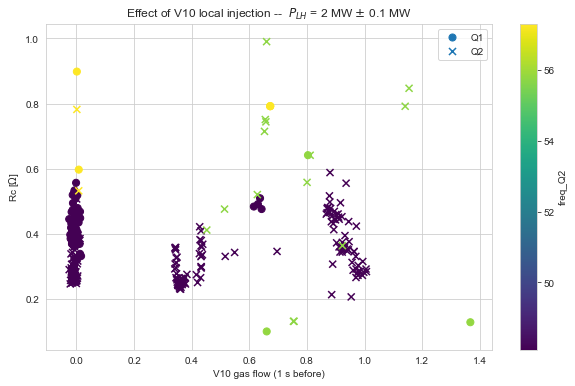

In [41]:
fig, ax = plt.subplots()
data_Q1.query('P_LH_avg > 1.9 & P_LH_avg < 2.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q1', s=50, cmap='viridis', colorbar=False, label='Q1')
data_Q2.query('P_LH_avg > 1.9 & P_LH_avg < 2.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q2', s=50, cmap='viridis', label='Q2', marker="x")
ax.set_title('Effect of V10 local injection --  $P_{LH}$ = 2 MW $\pm$ 0.1 MW')
ax.set_xlabel('V10 gas flow (1 s before)')
ax.set_ylabel('Rc [$\Omega$]')

fig.savefig('WEST_C3b_Rc_vs_V10before_vs_freq_Plh2MW.png', dpi=150)

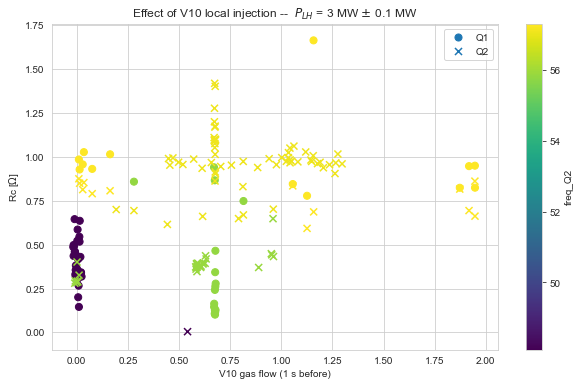

In [42]:
fig, ax = plt.subplots()
data_Q1.query('P_LH_avg > 2.9 & P_LH_avg < 3.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q1', s=50, cmap='viridis', colorbar=False, label='Q1')
data_Q2.query('P_LH_avg > 2.9 & P_LH_avg < 3.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q2', s=50, cmap='viridis', label='Q2', marker="x")
ax.set_title('Effect of V10 local injection --  $P_{LH}$ = 3 MW $\pm$ 0.1 MW')
ax.set_xlabel('V10 gas flow (1 s before)')
ax.set_ylabel('Rc [$\Omega$]')

fig.savefig('WEST_C3b_Rc_vs_V10before_vs_freq_Plh3MW.png', dpi=150)

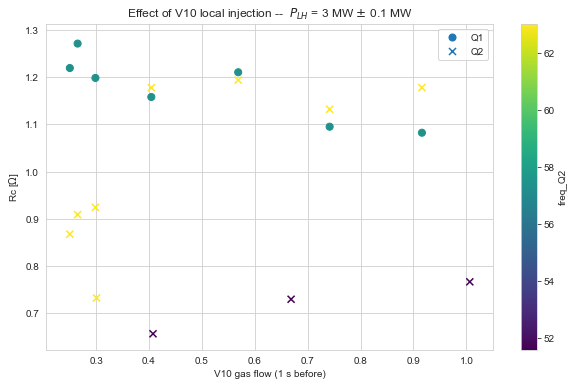

In [43]:
fig, ax = plt.subplots()
data_Q1.query('P_LH_avg > 3.9 & P_LH_avg < 4.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q1', s=50, cmap='viridis', colorbar=False, label='Q1')
data_Q2.query('P_LH_avg > 3.9 & P_LH_avg < 4.1').plot(ax=ax, kind='scatter', x='V10_before_avg', y='Rc_avg', c='freq_Q2', s=50, cmap='viridis', label='Q2', marker="x")
ax.set_title('Effect of V10 local injection --  $P_{LH}$ = 3 MW $\pm$ 0.1 MW')
ax.set_xlabel('V10 gas flow (1 s before)')
ax.set_ylabel('Rc [$\Omega$]')

fig.savefig('WEST_C3b_Rc_vs_V10before_vs_freq_Plh4MW.png', dpi=150)

# WEST C3b Average coupling resistances

In the follwing analysis, the coupling resistance measured during WEST shots with ICRH is extracted and plotted.

In [44]:
# for each pulse, determine the t_start and t_end of the IC power on Q1 and Q2
for pulse in db.pulse_list:
    try:
        y,t = db.get_signal(pulse, 'IC_P_Q2')
        idx = np.where(y > 100)[0]
        y, t = y[idx], t[idx]
        if np.any(t):
            t_start, t_stop = t[0], t[-1]
        else:
            t_start, t_stop = -1, -1
        db.add_attr(pulse, 'IC_P_Q2', 't_start', t_start)
        db.add_attr(pulse, 'IC_P_Q2', 't_stop', t_stop)
    except KeyError as e:
        print(f'No data for #{pulse}')

In [45]:
# for each pulse, determine the t_start and t_end of the IC power on Q1 and Q2
for pulse in db.pulse_list:
    try:
        y,t = db.get_signal(pulse, 'IC_P_Q1')
        idx = np.where(y > 100)[0]
        y, t = y[idx], t[idx]
        if np.any(t):
            t_start, t_stop = t[0], t[-1]
        else:
            t_start, t_stop = -1, -1
        db.add_attr(pulse, 'IC_P_Q1', 't_start', t_start)
        db.add_attr(pulse, 'IC_P_Q1', 't_stop', t_stop)
    except KeyError as e:
        print(f'No data for #{pulse}')

In [46]:
# generate averaged values for Q1
Q1_pulses, Rc_Q1 = [], [] 
for pulse in db.pulse_list:
    try:
        y, t = db.get_signal(pulse, 'IC_Rc_Q1_avg')
        t_start = db.get_attr(pulse, 'IC_P_Q1', 't_start')
        t_stop = db.get_attr(pulse, 'IC_P_Q1', 't_stop')
        if (t_start > 0) and (t_stop > 0):
            y,t = in_between(y, t, t_start, t_stop)
            Q1_pulses.append(pulse)
            # Smoothing data to remove non physical oscillations
            try:
                Rc_Q1.append(mean_min_max(smooth(y)))
            except:
                Rc_Q1.append([np.nan, np.nan, np.nan])
    except KeyError as e:
        pass
Rc_Q1 = np.array(Rc_Q1)
Q1_pulses = np.array(Q1_pulses)

In [47]:
# generate averaged values for Q2
Q2_pulses, Rc_Q2 = [], [] 
for pulse in db.pulse_list:
    try:
        y, t = db.get_signal(pulse, 'IC_Rc_Q2_avg')
        t_start = db.get_attr(pulse, 'IC_P_Q2', 't_start')
        t_stop = db.get_attr(pulse, 'IC_P_Q2', 't_stop')
        if (t_start > 0) and (t_stop > 0):
            y,t = in_between(y, t, t_start, t_stop)
            Q2_pulses.append(pulse)
            # Smoothing data to remove non physical oscillations
            try:
                Rc_Q2.append(mean_min_max(smooth(y)))
            except:
                Rc_Q2.append([np.nan, np.nan, np.nan])
    except KeyError as e:
        print(e)
Rc_Q2 = np.array(Rc_Q2)
Q2_pulses = np.array(Q2_pulses)

In [48]:
# get all the frequencies for all pulses
freqs = []
for pulse in db.pulse_list:
    try:
        _freqs, _ = db.get_signal(pulse, 'IC_Frequencies')
        freqs.append(_freqs)
    except KeyError as e:
        print(e)
freqs = np.array(freqs)

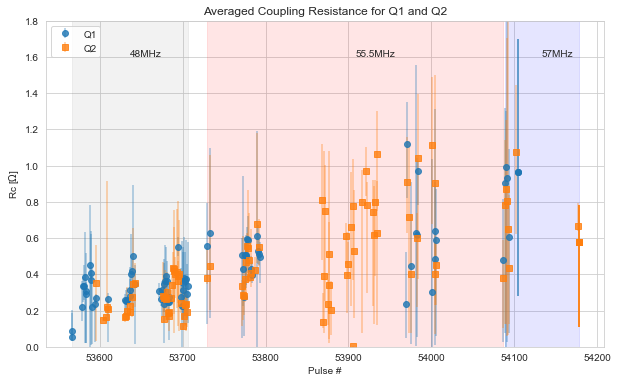

In [49]:
y_err_Q1 = np.abs(Rc_Q1[:,(1,2)].T - Rc_Q1[:,0])
y_err_Q2 = np.abs(Rc_Q2[:,(1,2)].T - Rc_Q2[:,0])

fig, ax = plt.subplots()
markers, caps, bars = ax.errorbar(Q1_pulses, Rc_Q1[:,0], yerr=y_err_Q1, ls='', marker='o', alpha=0.8, label='Q1')
# loop through bars and caps and set the alpha value
[bar.set_alpha(0.4) for bar in bars]
[cap.set_alpha(0.4) for cap in caps]

markers, caps, bars = ax.errorbar(Q2_pulses, Rc_Q2[:,0], yerr=y_err_Q2, ls='', marker='s', alpha=0.8, label='Q2')
# loop through bars and caps and set the alpha value
[bar.set_alpha(0.4) for bar in bars]
[cap.set_alpha(0.4) for cap in caps]

# display the used frequencies 
freqs_to_show = [48, 55.5, 57]
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors = ['gray', 'r', 'blue']
for i, freq_to_show in enumerate(freqs_to_show):
    _idx = np.isclose(freqs[:,0], freq_to_show, atol=0.3)#np.where(np.round(freqs)[:,0] == freq_to_show)[0]
    _pulses = np.array(db.pulse_list)[_idx]
    ax.axvspan(_pulses[0], _pulses[-1], alpha=0.1, color=colors[i] )
    ax.text((_pulses[0]+_pulses[-1])/2, 1.6, str(freq_to_show)+'MHz')

ax.set_xlabel('Pulse #')
ax.set_ylabel('Rc [$\Omega$]')
ax.grid(True)
ax.set_title('Averaged Coupling Resistance for Q1 and Q2')
ax.set_ylim(0, 1.8)
ax.legend(loc='upper left')

#plt.savefig('WEST_C3b_Rc_vs_pulse.png', dpi=150)

## Averaged Power vs shot #

In [50]:
# generate averaged values for Q1
Q1_pulses, P_avg_Q1 = [], [] 
for pulse in db.pulse_list:
    try:
        y, t = db.get_signal(pulse, 'IC_P_Q1')
        t_start = db.get_attr(pulse, 'IC_P_Q1', 't_start')
        t_stop = db.get_attr(pulse, 'IC_P_Q1', 't_stop')
        if (t_start > 0) and (t_stop > 0):
            y,t = in_between(y, t, t_start, t_stop)
            Q1_pulses.append(pulse)
            # Smoothing data to remove non physical oscillations
            try:
                P_avg_Q1.append(mean_min_max(smooth(y)))
            except:
                P_avg_Q1.append([np.nan, np.nan, np.nan])
    except KeyError as e:
        pass
P_avg_Q1 = np.array(P_avg_Q1)
Q1_pulses = np.array(Q1_pulses)

# generate averaged values for Q2
Q2_pulses, P_avg_Q2 = [], [] 
for pulse in db.pulse_list:
    try:
        y, t = db.get_signal(pulse, 'IC_P_Q2')
        t_start = db.get_attr(pulse, 'IC_P_Q2', 't_start')
        t_stop = db.get_attr(pulse, 'IC_P_Q2', 't_stop')
        if (t_start > 0) and (t_stop > 0):
            y,t = in_between(y, t, t_start, t_stop)
            Q2_pulses.append(pulse)
            # Smoothing data to remove non physical oscillations
            try:
                P_avg_Q2.append(mean_min_max(smooth(y)))
            except:
                P_avg_Q2.append([np.nan, np.nan, np.nan])
    except KeyError as e:
        pass
                
P_avg_Q2 = np.array(P_avg_Q2)
Q2_pulses = np.array(Q2_pulses)

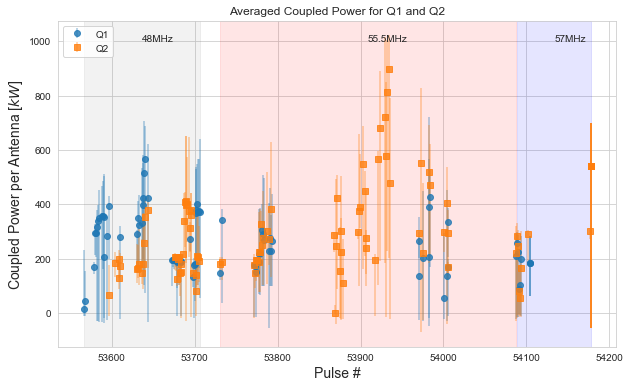

In [51]:
y_err_Q1 = np.abs(P_avg_Q1[:,(1,2)].T - P_avg_Q1[:,0])
y_err_Q2 = np.abs(P_avg_Q2[:,(1,2)].T - P_avg_Q2[:,0])

fig, ax = plt.subplots()
markers, caps, bars = ax.errorbar(Q1_pulses, P_avg_Q1[:,0], yerr=y_err_Q1, ls='', marker='o', alpha=0.8, label='Q1')
# loop through bars and caps and set the alpha value
[bar.set_alpha(0.4) for bar in bars]
[cap.set_alpha(0.4) for cap in caps]

markers, caps, bars = ax.errorbar(Q2_pulses, P_avg_Q2[:,0], yerr=y_err_Q2, ls='', marker='s', alpha=0.8, label='Q2')
# loop through bars and caps and set the alpha value
[bar.set_alpha(0.4) for bar in bars]
[cap.set_alpha(0.4) for cap in caps]

# display the used frequencies 
freqs_to_show = [48, 55.5, 57]
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors = ['gray', 'r', 'blue']
for i, freq_to_show in enumerate(freqs_to_show):
    _idx = np.isclose(freqs[:,0], freq_to_show, atol=0.3)#np.where(np.round(freqs)[:,0] == freq_to_show)[0]
    _pulses = np.array(db.pulse_list)[_idx]
    ax.axvspan(_pulses[0], _pulses[-1], alpha=0.1, color=colors[i] )
    ax.text((_pulses[0]+_pulses[-1])/2, 1000, str(freq_to_show)+'MHz')

ax.set_xlabel('Pulse #', fontsize=14)
ax.set_ylabel('Coupled Power per Antenna [$kW$]', fontsize=14)
ax.grid(True)
ax.set_title('Averaged Coupled Power for Q1 and Q2')
#
ax.legend(loc='upper left')

plt.savefig('WEST_C3b_Pavg_vs_pulse.png', dpi=150)

# Database statistics

In [52]:
print('Total number of points: ', len(data_Q1) + len(data_Q2))

Total number of points:  7599


In [53]:
print('Q1, nl: quantile 10%: ', data_Q1['nl_avg'].quantile(q=0.05))
print('Q2, nl: quantile 10%: ', data_Q2['nl_avg'].quantile(q=0.05))

print('Q1, nl: quantile 90%: ', data_Q1['nl_avg'].quantile(q=0.95))
print('Q2, nl: quantile 90%: ', data_Q2['nl_avg'].quantile(q=0.95))

Q1, nl: quantile 10%:  1.8559552026101345
Q2, nl: quantile 10%:  2.37818180176313
Q1, nl: quantile 90%:  3.7710551982326415
Q2, nl: quantile 90%:  3.9257956486559777


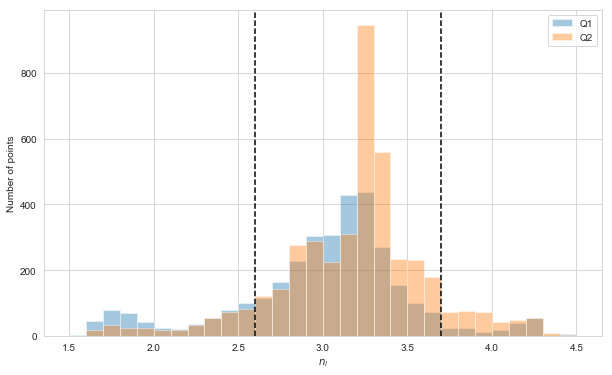

In [54]:
fig, ax = plt.subplots()
data_Q1['nl_avg'].hist(ax=ax, bins=30, alpha=0.4, range=(1.5,4.5), label='Q1')
data_Q2['nl_avg'].hist(ax=ax, bins=30, alpha=0.4, range=(1.5,4.5), label='Q2')

ax.set_xlabel('$n_l$')
ax.set_ylabel('Number of points')
ax.legend()

ax.axvline(2.6, color='k', ls='--')
ax.axvline(3.7, color='k', ls='--')

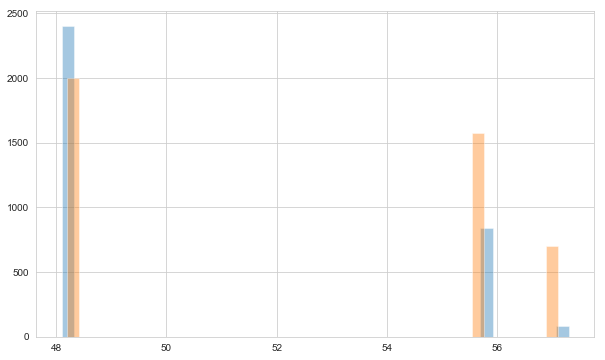

In [55]:
data_Q1['freq_Q1'].hist(bins=40, alpha=0.4)
data_Q2.query('freq_Q2 > 40')['freq_Q2'].hist(bins=40, alpha=0.4)


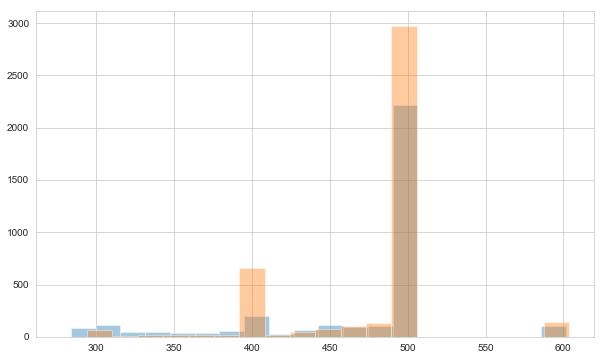

In [56]:
data_Q1['Ip_avg'].hist(bins=20, alpha=0.4)
data_Q2['Ip_avg'].hist(bins=20, alpha=0.4)

# Database cleaning

In [57]:
no_fuelling = 'V7_avg < 0.1 & V9_avg < 0.1  & V10_avg < 0.1  & V21_avg < 0.1'
no_LH = 'P_LH_avg < 0.1'
with_LH = 'P_LH_avg > 0.1' # exclusing 0 kW make easier interpretation
no_auto_matching = 'auto_matching == 0'  # excluse automatic matching points

gap = 'gap_median >= 0 & gap_median < 100'  # physical values only
nl_Q1 = 'nl_avg >= 1.8 & nl_avg <= 3.7'
nl_Q2 = 'nl_avg >= 2.3 & nl_avg <= 3.9'
freq = 'freq_Q1 <= 56 & freq_Q2 <= 56 '  # excluding 57 MHz points (no enough to be signifiant)

In [58]:
data_Q1_clean = data_Q1.query(gap).query(freq).query(nl_Q1)#.query(no_auto_matching) #
data_Q2_clean = data_Q2.query(gap).query(freq).query(nl_Q2)#.query(no_auto_matching)
print('Number of point in cleaning database: ', len(data_Q1_clean) + len(data_Q2_clean))

Number of point in cleaning database:  6086


In [59]:
sns.set_style('darkgrid')

In [60]:
selected_data_Q1 = data_Q1_clean[['Rc_avg', 'P_IC_avg', 'V7_avg', 'V9_avg',
       'V10_avg', 'V11_avg', 'V21_avg', 'V10_before_avg', 'V11_before_avg',
       'V21_before_avg', 'P_LH_avg', 'Zgeo', 'freq_Q1', 'gap_median', 'nl_avg', 'Ip_avg']]
selected_data_Q2 = data_Q2_clean[['Rc_avg', 'P_IC_avg', 'V7_avg', 'V9_avg',
       'V10_avg', 'V11_avg', 'V21_avg', 'V10_before_avg', 'V11_before_avg',
       'V21_before_avg', 'P_LH_avg', 'Zgeo', 'freq_Q2', 'gap_median', 'nl_avg', 'Ip_avg']]

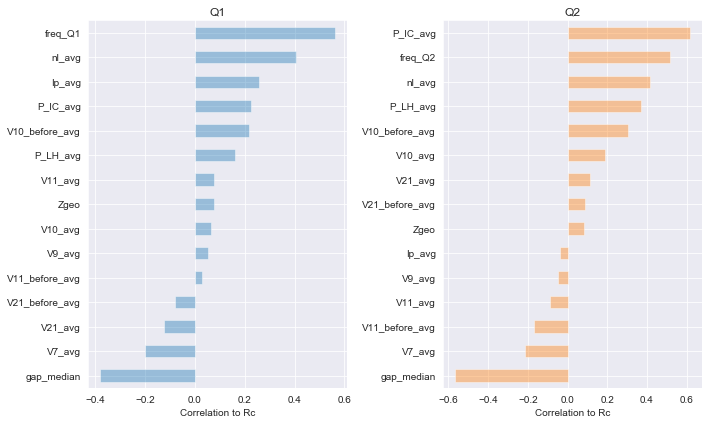

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2)
selected_data_Q1.corr()['Rc_avg'][1:].sort_values().plot(kind='barh', ax=ax1, color=sns.color_palette()[0], alpha=0.4)
selected_data_Q2.corr()['Rc_avg'][1:].sort_values().plot(kind='barh', ax=ax2, color=sns.color_palette()[1], alpha=0.4)

[ax.set_xlabel('Correlation to Rc') for ax in (ax1,ax2)]
ax1.set_title('Q1')
ax2.set_title('Q2')
fig.tight_layout()

fig.savefig('WEST_C3b_correlation_to_Rc.png', dpi=150)

# Role of frequency

(0, 0.9280553914019853)

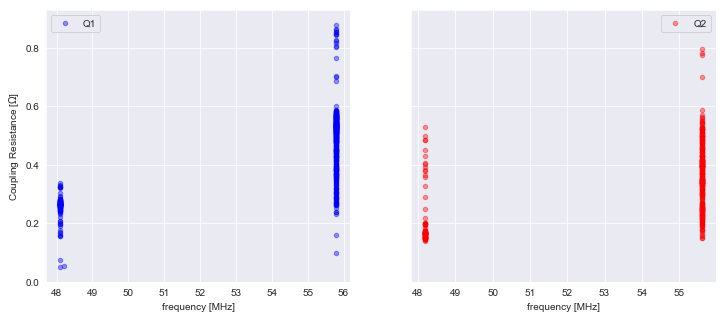

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(12,5))

data_Q1_clean.query(no_fuelling).query(no_LH).plot(x='freq_Q1', y='Rc_avg', kind='scatter', ax=ax1, label='Q1', c='b', alpha=0.4)
data_Q2_clean.query(no_fuelling).query(no_LH).plot(x='freq_Q2', y='Rc_avg', kind='scatter', ax=ax2, label='Q2', c='r', alpha=0.4)

[ax.set_xlabel('frequency [MHz]') for ax in (ax1,ax2)]
ax1.set_ylabel('Coupling Resistance [$\Omega$]')
ax1.set_ylim(bottom=0)


# Role of the LH Power

The LH power has been clearly identified during plasma session to improve the LH coupling. Let's see if it is visible in the database.


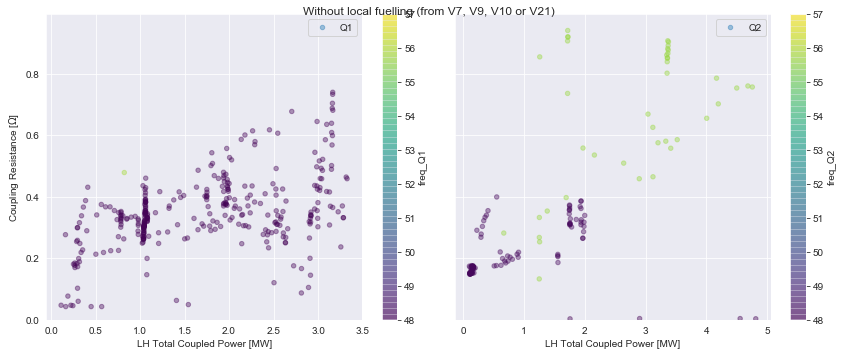

In [63]:
# excluding all fuelling effects, let's plot the coupling against the LH power
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(12,5))

data_Q1_clean.query(no_fuelling).query(with_LH).plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax1, label='Q1', c='freq_Q1', alpha=0.4, cmap='viridis', norm=plt.Normalize(vmin=48, vmax=57))
data_Q2_clean.query(no_fuelling).query(with_LH).plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax2, label='Q2', c='freq_Q2', alpha=0.4, cmap='viridis', norm=plt.Normalize(vmin=48, vmax=57))

[ax.set_xlabel('LH Total Coupled Power [MW]') for ax in (ax1,ax2)]
ax1.set_ylabel('Coupling Resistance [$\Omega$]')
ax1.set_ylim(bottom=0)

fig.suptitle('Without local fuelling (from V7, V9, V10 or V21)')
fig.tight_layout()

fig.savefig('WEST_C3b_Rc_vs_P_LH_nofuelling.png', dpi=150)


# Role of IC power

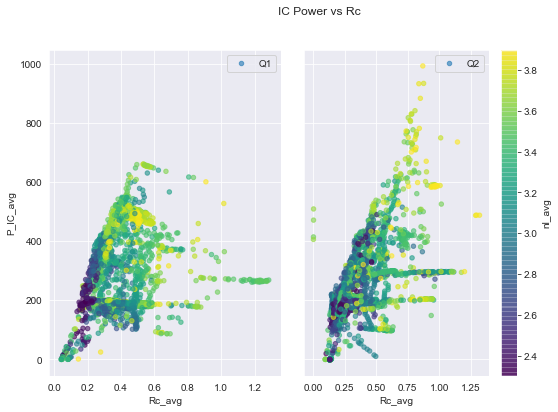

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
data_Q1_clean.plot(y='P_IC_avg', x='Rc_avg', kind='scatter', ax=ax1, c='nl_avg', alpha=0.6, cmap='viridis', label='Q1', colorbar=False)
data_Q2_clean.plot(y='P_IC_avg', x='Rc_avg', kind='scatter', ax=ax2, c='nl_avg', alpha=0.6, cmap='viridis', label='Q2')

fig.suptitle('IC Power vs Rc')
fig.subplots_adjust(right=.8, wspace=0.1)
#fig.tight_layout()


# Role of median gap

## Rc vs P_LH

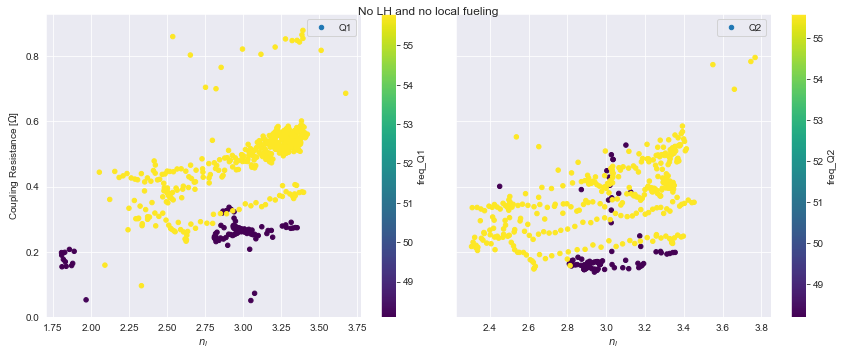

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(12,5))
data_Q1_clean.query(no_LH).query(no_fuelling).plot(x='nl_avg', y='Rc_avg', kind='scatter', ax=ax1, c='freq_Q1', cmap='viridis', label='Q1')
data_Q2_clean.query(no_LH).query(no_fuelling).plot(x='nl_avg', y='Rc_avg', kind='scatter', ax=ax2, c='freq_Q2', cmap='viridis', label='Q2')
fig.suptitle('No LH and no local fueling')
[ax.set_xlabel('$n_l$') for ax in (ax1,ax2)]
ax1.set_ylabel('Coupling Resistance [$\Omega$]')
fig.tight_layout()

fig.savefig('WEST_C3b_Rc_vs_nl_vs_freq.png', dpi=150)


How much the LH power is correlated to nl increase?

Text(0, 0.5, 'nl')

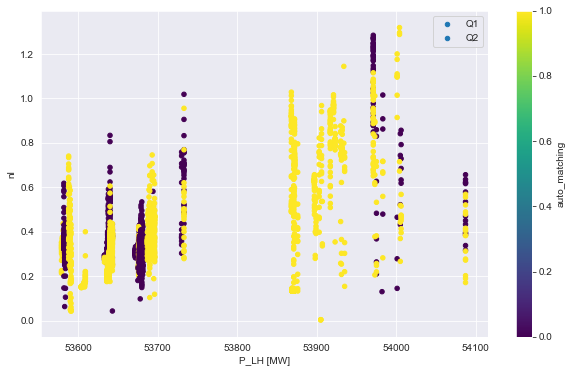

In [66]:
fig, ax = plt.subplots()
data_Q1_clean.query(with_LH).plot(x='pulse', y='Rc_avg', kind='scatter', c='auto_matching', ax=ax, label='Q1', cmap='viridis', colorbar=False)
data_Q2_clean.query(with_LH).plot(x='pulse', y='Rc_avg', kind='scatter', c='auto_matching', ax=ax, label='Q2', cmap='viridis')
ax.set_xlabel('P_LH [MW]')
ax.set_ylabel('nl')

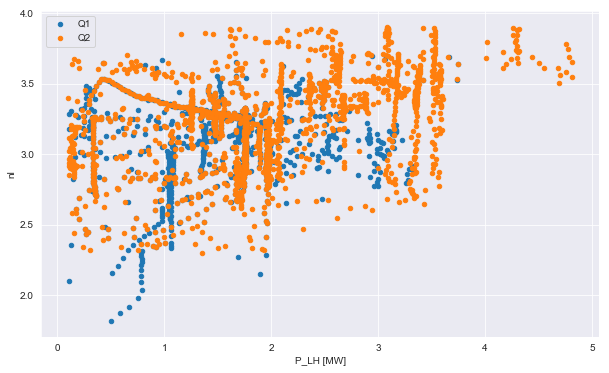

In [67]:
fig, ax = plt.subplots()
data_Q1_clean.query(with_LH).plot(x='P_LH_avg', y='nl_avg', kind='scatter', c=sns.color_palette()[0], ax=ax, label='Q1')
data_Q2_clean.query(with_LH).plot(x='P_LH_avg', y='nl_avg', kind='scatter', c=sns.color_palette()[1], ax=ax, label='Q2')
ax.set_xlabel('P_LH [MW]')
ax.set_ylabel('nl')
fig.savefig('WEST_C3b_nl_vs_PLH_vs_PIC.png', dpi=150)

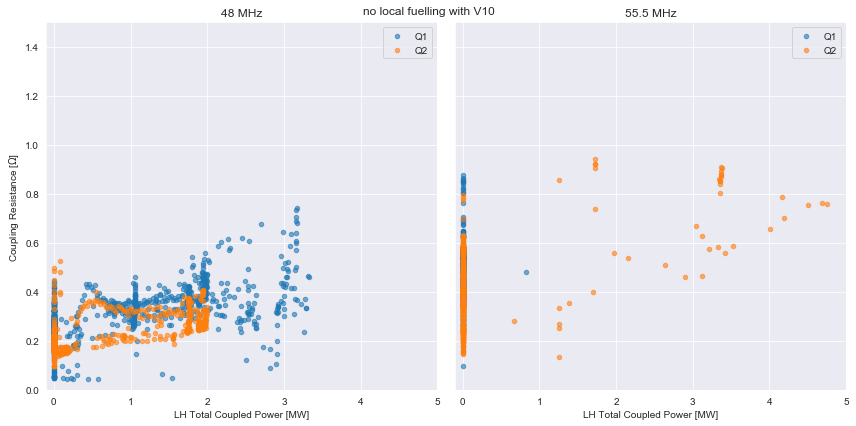

In [68]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(12,6))
data_Q1_clean.query('V10_avg < 0.1').query('freq_Q1 > 47 & freq_Q1 < 49').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax1, label='Q1', color=sns.color_palette()[0], alpha=0.6)
data_Q2_clean.query('V10_avg < 0.1').query('freq_Q1 > 47 & freq_Q1 < 49').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax1, label='Q2', color=sns.color_palette()[1], alpha=0.6)
ax1.set_title('48 MHz')

data_Q1_clean.query('V10_avg < 0.1').query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax2, label='Q1', color=sns.color_palette()[0], alpha=0.6)
data_Q2_clean.query('V10_avg < 0.1').query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax2, label='Q2', color=sns.color_palette()[1], alpha=0.6)
ax2.set_title('55.5 MHz')


[ax.set_xlabel('LH Total Coupled Power [MW]') for ax in (ax1, ax2)]
ax1.set_ylabel('Coupling Resistance [$\Omega$]')
ax1.set_ylim(0,1.5)
[ax.set_xlim(-0.1, 5) for ax in (ax1,ax2)]
fig.suptitle('no local fuelling with V10')
fig.tight_layout()

fig.savefig('WEST_C3b_Rc_vs_Plh_vs_frequ.png', dpi=150)

## Rc vs pulses

In [69]:
sns.set_style('whitegrid')

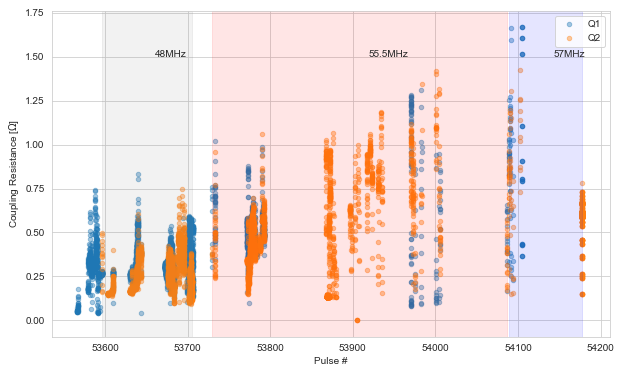

In [70]:
fig, ax = plt.subplots()
data_Q1.plot(x='pulse', y='data_Q1', kind='scatter', ax=ax, label='Q1', color=sns.color_palette()[0], alpha=0.4)
data_Q2.plot(x='pulse', y='Rc_avg', kind='scatter', ax=ax, label='Q2', color=sns.color_palette()[1], alpha=0.4)

ax.set_xlabel('Pulse #')
ax.set_ylabel('Coupling Resistance [$\Omega$]')
ax.legend()

# display the used frequencies 
freqs_to_show = [48, 55.5, 57]
colors = ['gray', 'r', 'blue']
for i, freq_to_show in enumerate(freqs_to_show):
    _idx = np.isclose(data_Q2['freq_Q1'].values, freq_to_show, atol=0.5)
    _pulses = np.array(data_Q2['pulse'])[_idx]
    ax.axvspan(_pulses[0], _pulses[-1], alpha=0.1, color=colors[i] )
    ax.text((_pulses[0]+_pulses[-1])/2+10, 1.5, str(freq_to_show)+'MHz')
#ax.set_xlim(right=54150)

fig.savefig('WEST_C3b_Rc_vs_pulse_fine.png', dpi=150)

In [114]:
# Export pour Walid
data_Q1[['pulse', 'freq_Q1', 'Rc_avg']].to_csv('Walid_Rc_vs_pulse_vs_freq_Q1.csv', index=False)
data_Q2[['pulse', 'freq_Q1', 'Rc_avg']].to_csv('Walid_Rc_vs_pulse_vs_freq_Q2.csv', index=False)


## When did we used gaz puffing close the antenna?

In [71]:
sns.set_style('darkgrid')

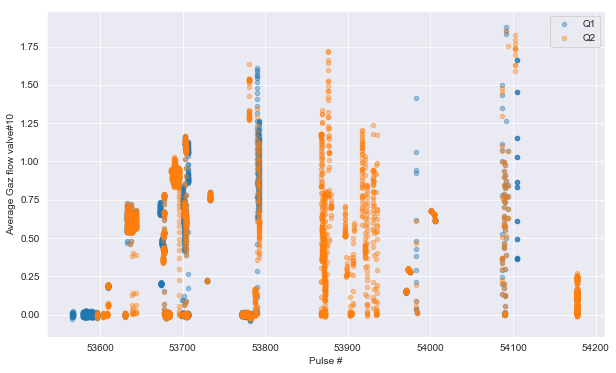

In [72]:
# Rc vs pulses
fig, ax = plt.subplots()
data_Q1.plot(x='pulse', y='V10_avg', kind='scatter', ax=ax, label='Q1', color=sns.color_palette()[0], alpha=0.4)
data_Q2.plot(x='pulse', y='V10_avg', kind='scatter', ax=ax, label='Q2', color=sns.color_palette()[1], alpha=0.4)

ax.set_xlabel('Pulse #')
ax.set_ylabel('Average Gaz flow valve#10')
ax.legend()
xlim = ax.get_xlim()
fig.savefig('WEST_C3b_V10_vs_pulse_fine.png', dpi=150)

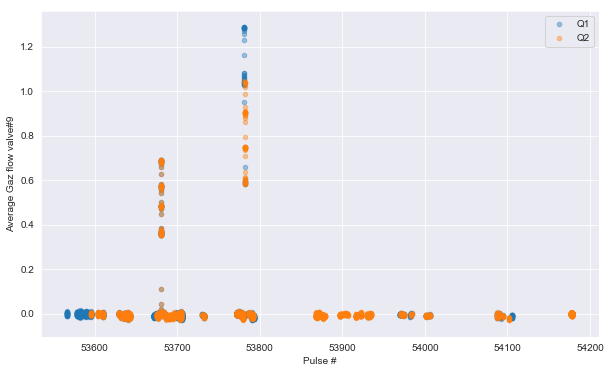

In [73]:
# Rc vs pulses
fig, ax = plt.subplots()
data_Q1.plot(x='pulse', y='V9_avg', kind='scatter', ax=ax, label='Q1', color=sns.color_palette()[0], alpha=0.4)
data_Q2.plot(x='pulse', y='V9_avg', kind='scatter', ax=ax, label='Q2', color=sns.color_palette()[1], alpha=0.4)

ax.set_xlabel('Pulse #')
ax.set_ylabel('Average Gaz flow valve#9')
ax.legend()
xlim = ax.get_xlim()
fig.savefig('WEST_C3b_V9_vs_pulse_fine.png', dpi=150)

## When did we used gaz puffing close the antenna without LH?

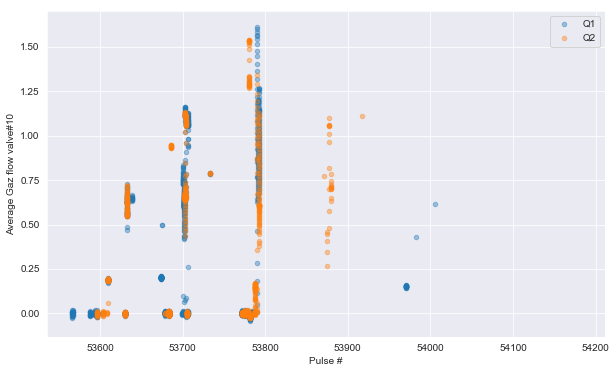

In [74]:
fig, ax = plt.subplots()
data_Q1_clean.query('P_LH_avg < 0.05').plot(x='pulse', y='V10_avg', kind='scatter', ax=ax, label='Q1', color=sns.color_palette()[0], alpha=0.4)
data_Q2_clean.query('P_LH_avg < 0.05').plot(x='pulse', y='V10_avg', kind='scatter', ax=ax, label='Q2', color=sns.color_palette()[1], alpha=0.4)

ax.set_xlabel('Pulse #')
ax.set_ylabel('Average Gaz flow valve#10')
ax.legend()
ax.set_xlim(xlim)
fig.savefig('WEST_C3b_V10_vs_pulse_fine_noLH.png', dpi=150)


## When did we used LH ?

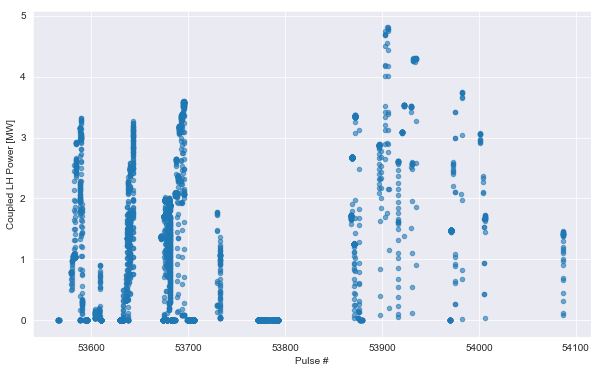

In [75]:
fig, ax = plt.subplots()
data_Q1_clean.plot(x='pulse', y='P_LH_avg', kind='scatter', alpha=0.6, ax=ax)
data_Q2_clean.plot(x='pulse', y='P_LH_avg', kind='scatter', alpha=0.6, ax=ax)
ax.set_xlabel('Pulse #')
ax.set_ylabel('Coupled LH Power [MW]')

fig.savefig('WEST_C3b_Plh_vs_pulse.png', dpi=150)

## Coupling resistance vs V9

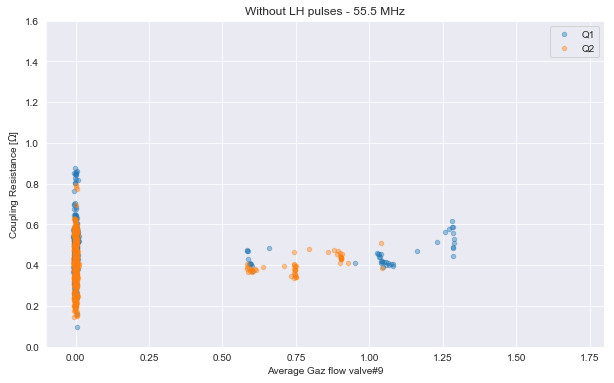

In [76]:
fig, ax = plt.subplots()
data_Q1_clean.query('V10_avg < 0.1').query(no_LH).query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='V9_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1', color=sns.color_palette()[0], alpha=0.4)
data_Q2_clean.query('V10_avg < 0.1').query(no_LH).query('freq_Q2 > 55 & freq_Q2 < 56').plot(x='V9_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2', color=sns.color_palette()[1], alpha=0.4)

ax.set_xlabel('Average Gaz flow valve#9')
ax.set_ylabel('Coupling Resistance [$\Omega$]')
ax.set_title('Without LH pulses - 55.5 MHz')
ax.legend()
ax.set_xlim(-0.1, 1.8)
ax.set_ylim(0, 1.6)

fig.savefig('WEST_C3b_Rc_vs_V9_Q1-Q2_withoutLH.png', dpi=150)

## Coupling resistance vs V10 without LH

In [77]:
data_Q1['gaz_puf_before'] = data_Q1['V10_before_avg'] + data_Q1['V7_before_avg']
data_Q2['gaz_puf_before'] = data_Q2['V10_before_avg'] + data_Q2['V7_before_avg']

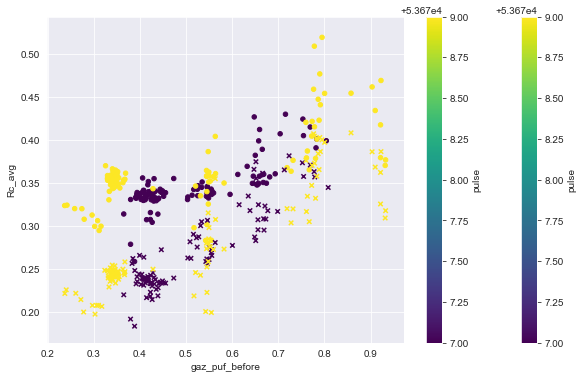

In [78]:
fig ,ax = plt.subplots()

data_Q1.query('pulse == 53679 | pulse == 53677 ').plot(ax=ax, kind='scatter', x='gaz_puf_before', y='Rc_avg', c='pulse', cmap='viridis')
data_Q2.query('pulse == 53679 | pulse == 53677 ').plot(ax=ax, kind='scatter', x='gaz_puf_before', y='Rc_avg', c='pulse', cmap='viridis', marker='x')

#ax.set_xlim(0.4, 0.8)

In [79]:
no537 = 'pulse not in [53700, 53701, 53702, 53703, 53704, 53705,53706]'

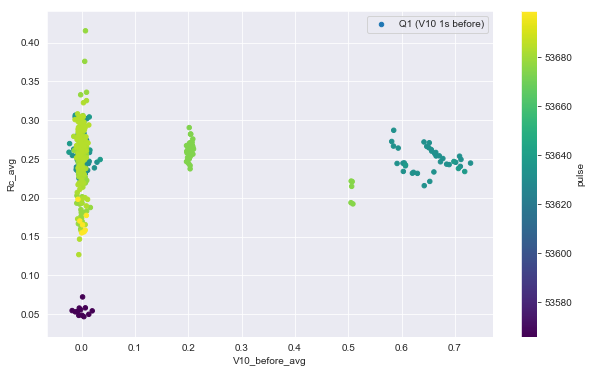

In [80]:
fig, ax = plt.subplots()
data_Q1_clean.query(no537).query(no_LH).query(no_auto_matching).query('freq_Q1 > 47 & freq_Q1 < 49').plot(
    x='V10_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 (V10 1s before)', 
    c='pulse', cmap='viridis')



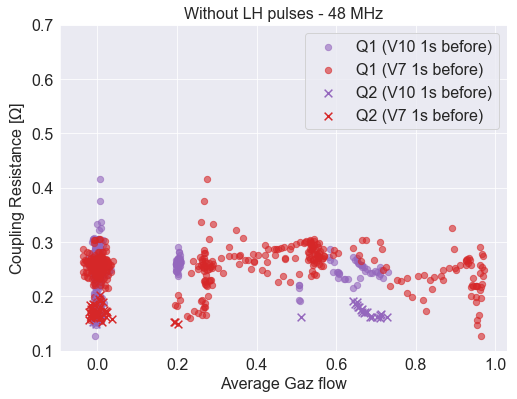

In [81]:
fig, ax = plt.subplots(figsize=(8,6))

data_Q1_clean.query(no537).query(no_LH).query(no_auto_matching).query('freq_Q1 > 47 & freq_Q1 < 49').plot(x='V10_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 (V10 1s before)', color=sns.color_palette()[4], alpha=0.6, s=40)
data_Q1_clean.query(no537).query(no_LH).query(no_auto_matching).query('freq_Q1 > 47 & freq_Q1 < 49').plot(x='V7_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 (V7 1s before)', color=sns.color_palette()[3], alpha=0.6, s=40)
data_Q2_clean.query(no537).query(no_LH).query(no_auto_matching).query('freq_Q2 > 47 & freq_Q2 < 49').plot(x='V10_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2 (V10 1s before)', color=sns.color_palette()[4], marker='x', s=60)
data_Q2_clean.query(no537).query(no_LH).query(no_auto_matching).query('freq_Q2 > 47 & freq_Q2 < 49').plot(x='V7_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2 (V7 1s before)', color=sns.color_palette()[3],  marker='x',  s=60)

ax.set_xlabel('Average Gaz flow', fontsize=16)
ax.set_ylabel('Coupling Resistance [$\Omega$]', fontsize=16)
ax.set_title('Without LH pulses - 48 MHz', fontsize=16)
ax.legend( fontsize=16)
ax.set_ylim(0.1, 0.7)
ax.tick_params(axis='both', which='major', labelsize=16)

fig.savefig('2019-04-19_Rc_vs_fueling - no LH.png', dpi=150)

In [82]:
with_LH

'P_LH_avg > 0.1'

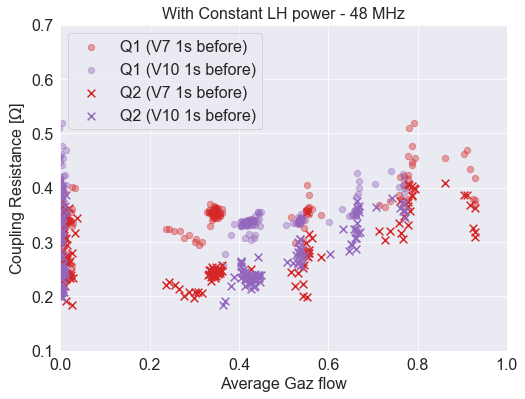

In [83]:
fig, ax = plt.subplots(figsize=(8,6))
data_Q1_clean.query(no537).query('pulse == 53679 | pulse == 53677 ').plot(x='V7_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 (V7 1s before)', color=sns.color_palette()[3], alpha=0.4, s=40)
data_Q1_clean.query(no537).query('pulse == 53679 | pulse == 53677 ').plot(x='V10_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 (V10 1s before)', color=sns.color_palette()[4], alpha=0.4, s=40)
data_Q2_clean.query(no537).query('pulse == 53679 | pulse == 53677 ').plot(x='V7_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2 (V7 1s before)', color=sns.color_palette()[3], s=60, marker='x')
data_Q2_clean.query(no537).query('pulse == 53679 | pulse == 53677 ').plot(x='V10_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2 (V10 1s before)', color=sns.color_palette()[4], s=60, marker='x')

ax.set_xlabel('Average Gaz flow', fontsize=16)
ax.set_ylabel('Coupling Resistance [$\Omega$]', fontsize=16)
ax.set_title('With Constant LH power - 48 MHz', fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.1, 0.7)

fig.savefig('2019-04-19_Rc_vs_fueling - with LH.png', dpi=150)

In [84]:
no_fuelling_before = 'V7_before_avg < 0.1 & V10_before_avg < 0.1'

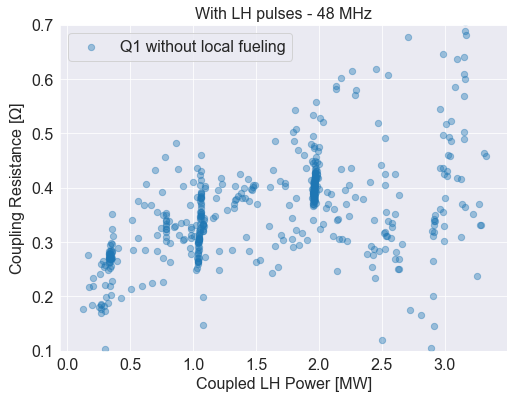

In [85]:
fig, ax = plt.subplots(figsize=(8,6))
data_Q1.query(no_fuelling_before).query(with_LH).query('freq_Q1 > 47 & freq_Q1 < 49').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 without local fueling', color=sns.color_palette()[0], alpha=0.4, s=40)
#data_Q1_clean.query(no537).query(with_LH).query('freq_Q1 > 47 & freq_Q1 < 49').query('V7_before_avg > 0.1').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 with V7', color=sns.color_palette()[3], s=40)
#data_Q1_clean.query(no537).query(with_LH).query('freq_Q1 > 47 & freq_Q1 < 49').query('V10_before_avg > 0.1').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 with V10', color=sns.color_palette()[4], s=40)

ax.set_xlabel('Coupled LH Power [MW]', fontsize=16)
ax.set_ylabel('Coupling Resistance [$\Omega$]', fontsize=16)
ax.set_title('With LH pulses - 48 MHz', fontsize=16)
ax.legend(fontsize=16)
ax.set_ylim(0.1, 0.7)
ax.tick_params(axis='both', which='major', labelsize=16)

fig.savefig('2019-04-19_RcQ1_vs_Plh_V11.png', dpi=150)

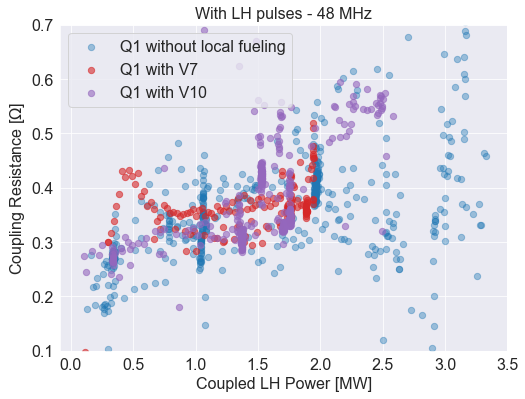

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
data_Q1.query(no_fuelling_before).query(with_LH).query('freq_Q1 > 47 & freq_Q1 < 49').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 without local fueling', color=sns.color_palette()[0], alpha=0.4, s=40)
data_Q1_clean.query(no537).query(with_LH).query('freq_Q1 > 47 & freq_Q1 < 49').query('V7_before_avg > 0.1').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 with V7', color=sns.color_palette()[3], alpha=.6, s=40)
data_Q1_clean.query(no537).query(with_LH).query('freq_Q1 > 47 & freq_Q1 < 49').query('V10_before_avg > 0.1').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1 with V10', color=sns.color_palette()[4], alpha=.6, s=40)

ax.set_xlabel('Coupled LH Power [MW]', fontsize=16)
ax.set_ylabel('Coupling Resistance [$\Omega$]', fontsize=16)
ax.set_title('With LH pulses - 48 MHz', fontsize=16)
ax.legend(fontsize=16)
ax.set_ylim(0.1, 0.7)
ax.tick_params(axis='both', which='major', labelsize=16)

fig.savefig('2019-04-19_RcQ1_vs_Plh_V7-V10-V11.png', dpi=150)

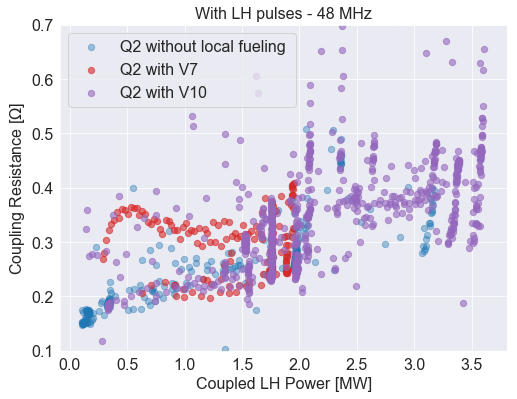

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
data_Q2.query(no_fuelling_before).query(with_LH).query('freq_Q2 > 47 & freq_Q2 < 49').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2 without local fueling ', color=sns.color_palette()[0], alpha=0.4, s=40)
data_Q2_clean.query(no537).query(with_LH).query('freq_Q2 > 47 & freq_Q2 < 49').query('V7_before_avg > 0.1').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2 with V7', color=sns.color_palette()[3], alpha=0.6, s=40)
data_Q2_clean.query(no537).query(with_LH).query('freq_Q2 > 47 & freq_Q2 < 49').query('V10_before_avg > 0.1').plot(x='P_LH_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2 with V10', color=sns.color_palette()[4], alpha=0.6, s=40)

ax.set_xlabel('Coupled LH Power [MW]', fontsize=16)
ax.set_ylabel('Coupling Resistance [$\Omega$]', fontsize=16)
ax.set_title('With LH pulses - 48 MHz', fontsize=16)
ax.legend(fontsize=16)
ax.set_ylim(0.1, 0.7)
ax.tick_params(axis='both', which='major', labelsize=16)

fig.savefig('2019-04-19_RcQ2_vs_Plh_V7-V10-V11.png', dpi=150)

In [88]:
data_Q2['Lang_LH1_avg'] = (data_Q2['Lang1_avg'] + data_Q2['Lang2_avg'] + data_Q2['Lang4_avg'])/3
data_Q2['Lang_LH2_avg'] = (data_Q2['Lang5_avg'] + data_Q2['Lang6_avg'] + data_Q2['Lang7_avg'] + data_Q2['Lang8_avg'])/4

In [89]:
data_Q2['ne_LH1_sur_nl'] = data_Q2['Lang_LH1_avg'] / data_Q2['nl_avg']
data_Q2['ne_LH2_sur_nl'] = data_Q2['Lang_LH2_avg'] / data_Q2['nl_avg']

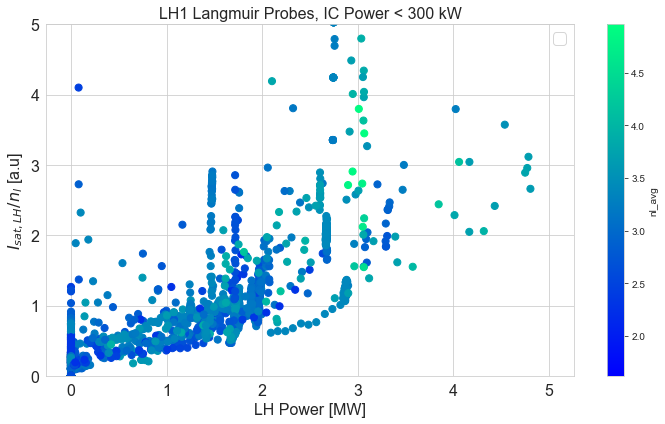

In [90]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
data_Q2.query('P_IC_avg < 300').query('freq_Q2 > 40').query('gap_median < 40').plot(ax=ax, kind='scatter', 
             x='P_LH_avg', y='ne_LH1_sur_nl',
            c='nl_avg', cmap='winter', s=50)
ax.set_ylim(0,5)
ax.set_xlabel('LH Power [MW]', fontsize=16)
ax.set_ylabel('$I_{sat,LH}/n_l$ [a.u]', fontsize=16)
ax.set_title('LH1 Langmuir Probes, IC Power < 300 kW', fontsize=16)

ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)


fig.tight_layout()

fig.savefig('2019-04-19_IsatLH1SurNl_vs_PLH.png', dpi=150)

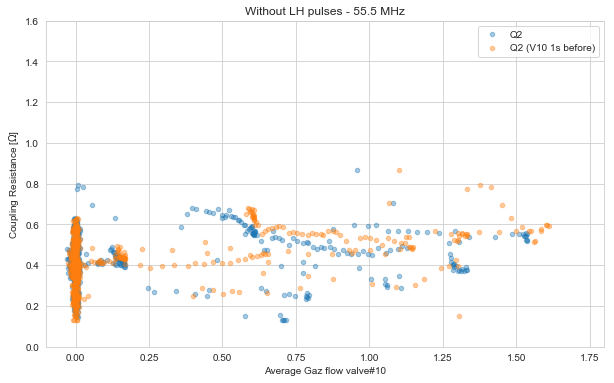

In [91]:
fig, ax = plt.subplots()
data_Q2_clean.query(no_LH).query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='V10_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2', color=sns.color_palette()[0], alpha=0.4)
data_Q2_clean.query(no_LH).query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='V10_before_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2 (V10 1s before)', color=sns.color_palette()[1], alpha=0.4)

ax.set_xlabel('Average Gaz flow valve#10')
ax.set_ylabel('Coupling Resistance [$\Omega$]')
ax.set_title('Without LH pulses - 55.5 MHz')
ax.legend()
ax.set_xlim(-0.1, 1.8)
ax.set_ylim(0, 1.6)

fig.savefig('WEST_C3b_Rc_vs_V10_Q2_fine_withoutLH.png', dpi=150)

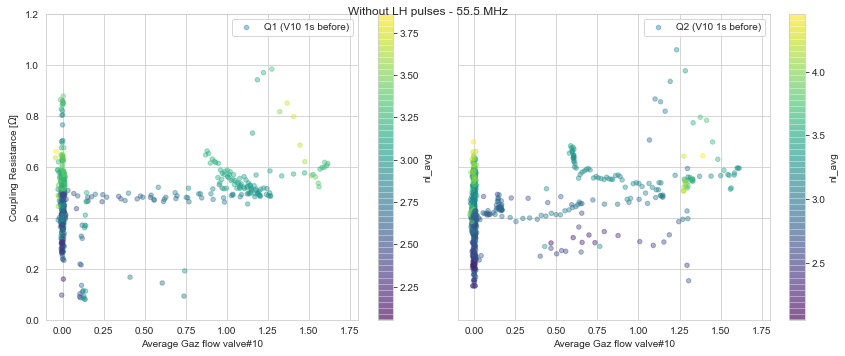

In [92]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(12,5))
data_Q1.query(no_LH).query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='V10_before_avg', y='Rc_avg', kind='scatter', ax=ax1, label='Q1 (V10 1s before)', c='nl_avg', cmap='viridis', alpha=0.4)
data_Q2.query(no_LH).query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='V10_before_avg', y='Rc_avg', kind='scatter', ax=ax2, label='Q2 (V10 1s before)', c='nl_avg', cmap='viridis', alpha=0.4)

[ax.set_xlabel('Average Gaz flow valve#10') for ax in (ax1,ax2)]
ax1.set_ylabel('Coupling Resistance [$\Omega$]')
plt.suptitle('Without LH pulses - 55.5 MHz')
[ax.set_xlim(-0.1, 1.8) for ax in (ax1,ax2)]
ax1.set_ylim(0, 1.2)

fig.tight_layout()
fig.savefig('WEST_C3b_Rc_vs_V10_Q2_fine_withoutLH_vs_nl.png', dpi=150)

## Coupling resistance vs gas flow 11

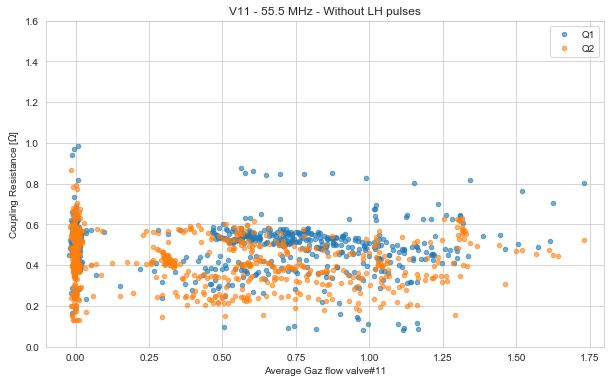

In [93]:
fig, ax = plt.subplots()
#data_Q1.plot(x='V10_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1', color=sns.color_palette()[0], alpha=0.4)
data_Q1_clean.query(no_LH).query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='V11_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q1', color=sns.color_palette()[0], alpha=0.6)
data_Q2_clean.query(no_LH).query('freq_Q1 > 55 & freq_Q1 < 56').plot(x='V11_avg', y='Rc_avg', kind='scatter', ax=ax, label='Q2', color=sns.color_palette()[1], alpha=0.6)


ax.set_xlabel('Average Gaz flow valve#11')
ax.set_ylabel('Coupling Resistance [$\Omega$]')
ax.set_title('V11 - 55.5 MHz - Without LH pulses')
ax.legend()
ax.set_xlim(-0.1, 1.8)
ax.set_ylim(0, 1.6)

fig.savefig('WEST_C3b_Rc_vs_V11_Q1-Q2_fine_withoutLH.png', dpi=150)

## Coupling resistance vs plasma positions 

Without fueling by V10

In [94]:
def Rc_theoretical(x, lambd, A):
    return A*np.exp(-x/lambd)

popt_Q2, pcov = curve_fit(f=Rc_theoretical, 
          xdata=data_Q2_clean.query(no_LH).query('freq_Q1>55 & freq_Q1<56')['gap_median'].values, 
          ydata=data_Q2_clean.query(no_LH).query('freq_Q1>55 & freq_Q1<56')['Rc_avg'].values)

popt_Q1, pcov = curve_fit(f=Rc_theoretical, 
          xdata=data_Q1_clean.query(no_LH).query('freq_Q1>55 & freq_Q1<56').dropna()['gap_median'].values, 
          ydata=data_Q1_clean.query(no_LH).query('freq_Q1>55 & freq_Q1<56').dropna()['Rc_avg'].values)


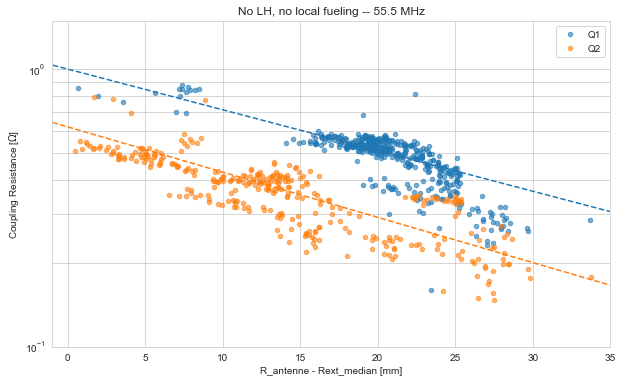

In [95]:
fig, ax = plt.subplots()
# using a sequential colormap to display the associated shot numner
# in the hope to understand when pulses have been made
data_Q1_clean.query(no_LH).query(no_fuelling).query('freq_Q1>55 & freq_Q1<56').plot(kind='scatter', x='gap_median', y='Rc_avg', ax=ax, label='Q1', color=sns.color_palette()[0], alpha=0.6)
data_Q2_clean.query(no_LH).query(no_fuelling).query('freq_Q1>55 & freq_Q1<56').plot(kind='scatter', x='gap_median', y='Rc_avg', ax=ax, label='Q2', color=sns.color_palette()[1], alpha=0.6)

d_gap = np.linspace(-5, 40, 201)
ax.plot(d_gap, Rc_theoretical(d_gap, popt_Q1[0], popt_Q1[1]), color=sns.color_palette()[0], ls='--')
ax.plot(d_gap, Rc_theoretical(d_gap, popt_Q2[0], popt_Q2[1]), color=sns.color_palette()[1], ls='--')

ax.set_xlabel('R_antenne - Rext_median [mm]')
ax.set_ylabel('Coupling Resistance [$\Omega$]')
ax.set_title('No LH, no local fueling -- 55.5 MHz')
ax.legend()
ax.set_xlim(-1, 35)
ax.set_ylim(0.1, 1.5)
ax.set_yscale('log')
ax.grid(True, which='minor')
fig.savefig('WEST_C3b_Rc_vs_gap_median.png', dpi=150)

Export des points pour Walid:

In [110]:
data_Q1_clean.query(no_LH).query(no_fuelling).query('freq_Q1>55 & freq_Q1<56')[['gap_median', 'Rc_avg']].to_csv('Walid_Rc_vs_RantRext_Q1.csv', index=False)
data_Q2_clean.query(no_LH).query(no_fuelling).query('freq_Q1>55 & freq_Q1<56')[['gap_median', 'Rc_avg']].to_csv('Walid_Rc_vs_RantRext_Q2.csv', index=False)

(0, 1.0)

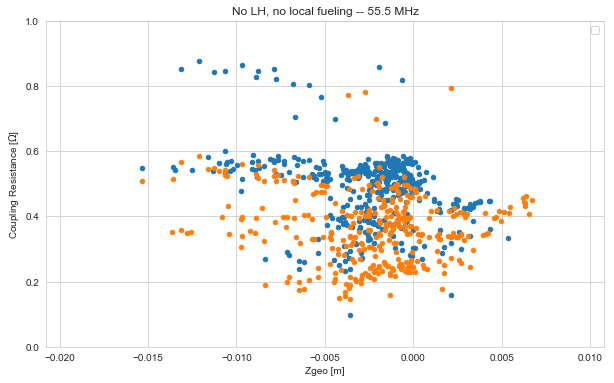

In [96]:
fig, ax = plt.subplots()
data_Q1_clean.query(no_LH).query(no_fuelling).query('freq_Q1>55 & freq_Q1<56').plot(kind='scatter', ax=ax, x='Zgeo', y='Rc_avg', c=sns.color_palette()[0])
data_Q2_clean.query(no_LH).query(no_fuelling).query('freq_Q2>55 & freq_Q2<56').plot(kind='scatter', ax=ax, x='Zgeo', y='Rc_avg', c=sns.color_palette()[1])


ax.set_xlabel('Zgeo [m]')
ax.set_ylabel('Coupling Resistance [$\Omega$]')
ax.set_title('No LH, no local fueling -- 55.5 MHz')
ax.legend()
ax.set_ylim(0, 1.0)

# Scikit-learn analysis


In [97]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import linear_model

## Ridge Regression

In [98]:
chosen_parameters = ['V7_avg', 'V10_avg', 'V11_avg', 'V10_before_avg', 'V11_before_avg', 'P_LH_avg', 'gap_median', 'nl_avg', 'Ip_avg' ]
dataset_x = data_Q1_clean.query('freq_Q1 > 55 & freq_Q1 < 56').dropna()[chosen_parameters].values
dataset_y = data_Q1_clean.query('freq_Q1 > 55 & freq_Q1 < 56').dropna()[['Rc_avg']].values

In [99]:
reg = linear_model.Ridge()
reg.fit(dataset_x, dataset_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

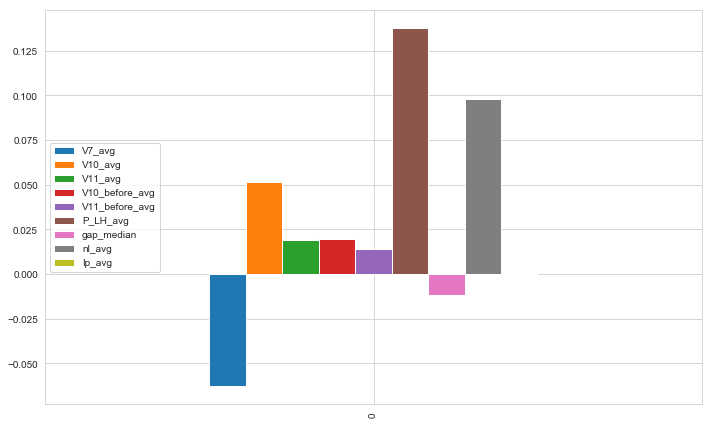

In [100]:
fig, ax = plt.subplots()
pd.DataFrame(data=reg.coef_, columns=chosen_parameters).plot(kind='bar', ax=ax)
ax.legend(loc='center left')
fig.tight_layout()

## Principal component analysis (PCA)
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.

In [101]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [102]:
chosen_parameters = ['V7_avg', 'V10_avg', 'V11_avg', 'V10_before_avg', 'V11_before_avg', 'P_LH_avg', 'gap_median', 'nl_avg', 'auto_matching' ]
dataset_x = data_Q2_clean.query('freq_Q2 > 55 & freq_Q2 < 56').dropna()[chosen_parameters].values
dataset_y = data_Q2_clean.query('freq_Q2 > 55 & freq_Q2 < 56').dropna()[['Rc_avg']].values

In [103]:
pca = PCA(n_components=4)
new_dataset_x = StandardScaler().fit_transform(dataset_x)

X_r = pca.fit_transform(new_dataset_x)
pca.explained_variance_ratio_*100

array([38.00252864, 15.65857138, 12.9782431 , 11.10890647])

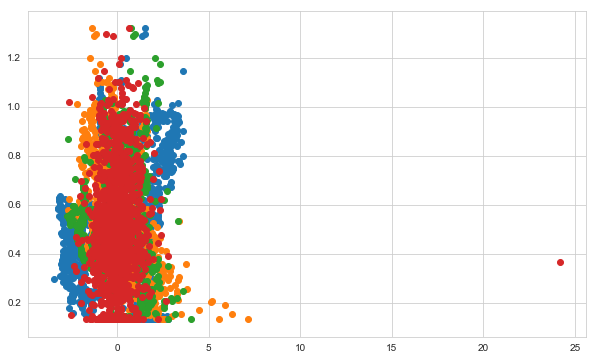

In [104]:
fig, ax = plt.subplots()
[ax.scatter(X_r[:,id], dataset_y) for id in range(X_r.shape[1])]